In [132]:
from scipy.stats import mannwhitneyu, normaltest
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

%matplotlib inline

In [74]:
def get_dataframe(filepath: str) -> pd.DataFrame:

    # load results into pd.DataFrame
    data_path = f"../results/{filepath}"
    df = pd.read_csv(
        filepath_or_buffer=data_path,
        sep=",",
        header=0,
    )

    return df


rename_dict = {
    'tournament_selection_training_min_fitness': "fit_train_tournament",
    'tournament_selection_testing_min_fitness' : "fit_test_tournament",
    'epsilon_lexicase_selection_training_min_fitness' : "fit_train_elexicase",
    'epsilon_lexicase_selection_testing_min_fitness' : "fit_test_elexicase"
    
}

results_square = get_dataframe("multiple_runs_squared.csv")
results_square.rename(columns=rename_dict,inplace=True)

results_absolute = get_dataframe("multiple_runs_absolute.csv")
results_absolute.rename(columns=rename_dict,inplace=True)


In [76]:
# descriptive statistics for experiment run with MAE as fitness
results_absolute.describe()

,fit_train_tournament,fit_test_tournament,fit_train_elexicase,fit_test_elexicase
count,101.000000,101.000000,101.000000,101.000000
mean,3.586249,3.580008,3.114125,3.140942
std,0.775525,0.778651,0.682901,0.651595
min,2.321738,2.196453,1.576327,1.678117
25%,3.231671,3.227408,2.622392,2.618833
50%,3.465395,3.484716,3.200231,3.176300
75%,3.830948,3.696615,3.582842,3.620482
max,8.262926,8.522100,5.155625,4.948786


In [77]:
# descriptive statistics for experiment run with MSE as fitness
results_square.describe()

,fit_train_tournament,fit_test_tournament,fit_train_elexicase,fit_test_elexicase
count,101.000000,101.000000,101.000000,101.000000
mean,23.632817,23.972819,19.962104,20.402594
std,11.109297,11.162756,11.951962,11.907628
min,10.988769,11.146286,3.165682,2.948830
25%,17.747310,17.841998,11.140774,13.065327
50%,21.031165,21.324918,17.325292,18.114140
75%,24.753876,24.807213,25.482296,24.362381
max,73.716858,70.483450,66.005119,64.794064


In [102]:
n_squared = len(results_square)
n_absolute = len(results_absolute)

In [87]:
# Check if data series are normal distributed at alpha=5%

HEADERS = results_square.columns.values.tolist()

print("MSE-Based: \n----")
for header in HEADERS:

    print(f"Data Series: {header}")
    statistic, pval = normaltest(results_square[header])

    print(f"Statistic: {statistic}\nP-Val: {pval}\n")



print("MAE-Based: \n----")
for header in HEADERS:

    print(f"Data Series: {header}")
    statistic, pval = normaltest(results_absolute[header])

    print(f"Statistic: {statistic}\nP-Val: {pval}\n")


MSE-Based: 
----
Data Series: fit_train_tournament
Statistic: 69.85793547968142
P-Val: 6.769273354916036e-16

Data Series: fit_test_tournament
Statistic: 66.49871888748044
P-Val: 3.630669081159066e-15

Data Series: fit_train_elexicase
Statistic: 39.88473876909755
P-Val: 2.183428728347867e-09

Data Series: fit_test_elexicase
Statistic: 42.06132666952384
P-Val: 7.353582395107738e-10

MAE-Based: 
----
Data Series: fit_train_tournament
Statistic: 91.74590765805914
P-Val: 1.195719421802768e-20

Data Series: fit_test_tournament
Statistic: 98.22235405385021
P-Val: 4.691230988639084e-22

Data Series: fit_train_elexicase
Statistic: 0.004853723603615021
P-Val: 0.9975760806465086

Data Series: fit_test_elexicase
Statistic: 0.3298547175485213
P-Val: 0.8479552983629921



In [124]:
def test_mannwhitneyu(df: pd.DataFrame, xheader: str, yheader: str) -> None:
    
    ALPHA = 0.05

    statistic, pval = mannwhitneyu(x = df[xheader],y = df[yheader])
    print(f"Statistic: {statistic}\nPVal: {pval}\nPVal < ALPHA: {pval < ALPHA}")

    if pval > ALPHA:
        print(f"Results supports H0 for alpha={ALPHA}\n H0: The distribution underlying sample {xheader} is the same as the distribution underlying sample {yheader}")

    else:
        print(f"H0 can be rejected for alpha={ALPHA}\nThe distribution underlying sample {xheader} is NOT the same as the distribution underlying sample {yheader}")



Statistic: 6435.0
PVal: 0.0013214889970359326
PVal < ALPHA: True
H0 can be rejected for alpha=0.05
The distribution underlying sample fit_train_tournament is NOT the same as the distribution underlying sample fit_train_elexicase


Text(0.5, 1.0, 'Training Error - Distribution for n=101 runs')

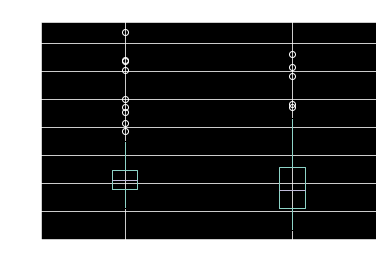

In [133]:
test_mannwhitneyu(results_square, "fit_train_tournament", "fit_train_elexicase")

subplot_train_squared = results_square.boxplot(column=[HEADERS[0], HEADERS[2]])
subplot_train_squared.set_ylabel("MSE")
subplot_train_squared.set_title(f"Training Error - Distribution for n={n_squared} runs")



Statistic: 6812.0
PVal: 3.808371610023629e-05
PVal < ALPHA: True
H0 can be rejected for alpha=0.05
The distribution underlying sample fit_train_tournament is NOT the same as the distribution underlying sample fit_train_elexicase


Text(0.5, 1.0, 'Training Error - Distribution for n=101 runs')

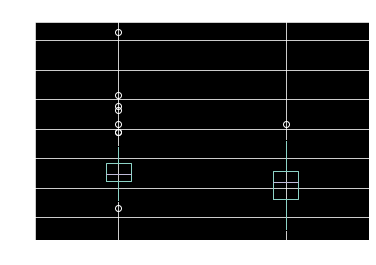

In [134]:
test_mannwhitneyu(results_absolute, "fit_train_tournament", "fit_train_elexicase")

subplot_train_absolute = results_absolute.boxplot(column=[HEADERS[0], HEADERS[2]])
subplot_train_absolute.set_ylabel("MAE")
subplot_train_absolute.set_title(f"Training Error - Distribution for n={n_absolute} runs")

Statistic: 6445.0
PVal: 0.0012149614557104113
PVal < ALPHA: True
H0 can be rejected for alpha=0.05
The distribution underlying sample fit_test_tournament is NOT the same as the distribution underlying sample fit_test_elexicase


Text(0.5, 1.0, 'Testing Error - Distribution for n=101 runs')

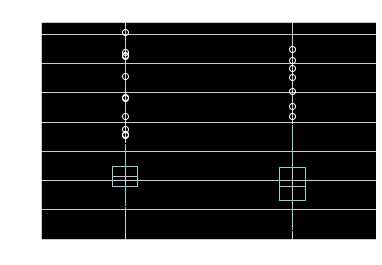

In [135]:
test_mannwhitneyu(results_square, "fit_test_tournament", "fit_test_elexicase")

subplot_test_squared = results_square.boxplot(column=[HEADERS[1], HEADERS[3]])
subplot_test_squared.set_ylabel("MSE")
subplot_test_squared.set_title(f"Testing Error - Distribution for n={n_squared} runs")

Statistic: 6768.0
PVal: 5.9980123672234114e-05
PVal < ALPHA: True
H0 can be rejected for alpha=0.05
The distribution underlying sample fit_test_tournament is NOT the same as the distribution underlying sample fit_test_elexicase


Text(0.5, 1.0, 'Testing Error - Distribution for n=101 runs')

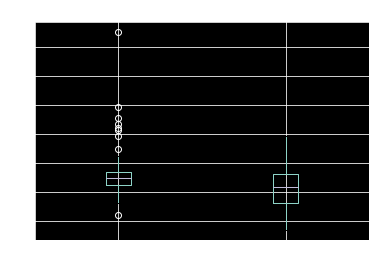

In [136]:
test_mannwhitneyu(results_absolute, "fit_test_tournament", "fit_test_elexicase")

subplot_test_absolute = results_absolute.boxplot(column=[HEADERS[1], HEADERS[3]])
subplot_test_absolute.set_ylabel("MAE")
subplot_test_absolute.set_title(f"Testing Error - Distribution for n={n_absolute} runs")